In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
df1=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7_120apl/openmm_dcle_tightrest/scissor_kick.csv')
df2=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7_120apl/openmm_dcle_tightrest.2/scissor_kick.csv')
df3=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7_120apl/openmm_dcle_tightrest.3/scissor_kick.csv')

In [3]:
df1.head()

,Frame,scissor,kick
0,0,90.544680,15.443075
1,1,89.462394,13.837631
2,2,88.504257,11.910336
3,3,91.754903,11.435388
4,4,89.786455,6.760831


Text(0, 0.5, 'C2 out-of-plane "kick" angle [deg]')

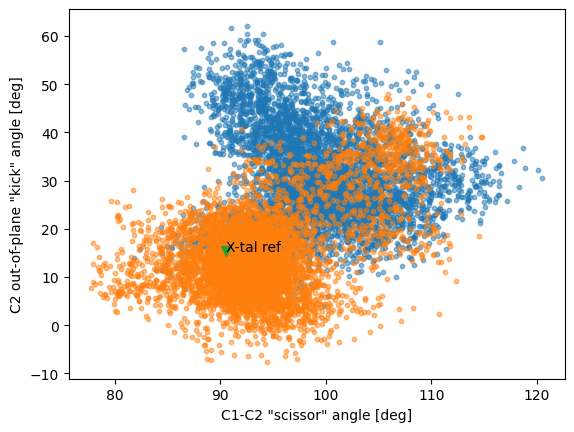

In [4]:
fig, ax = plt.subplots()

ax.scatter(df1.scissor,df1.kick,alpha=0.5,s=10)
ax.scatter(df2.scissor,df2.kick,alpha=0.5,s=10)
#ax.scatter(df3.scissor,df3.kick,alpha=0.5,s=10)
ax.scatter(df1.scissor[0],df1.kick[0],marker='v',s=50)

ax.annotate('X-tal ref', (df1.scissor[0], df1.kick[0]),size=10)
ax.set_xlabel('C1-C2 "scissor" angle [deg]')
ax.set_ylabel('C2 out-of-plane "kick" angle [deg]')

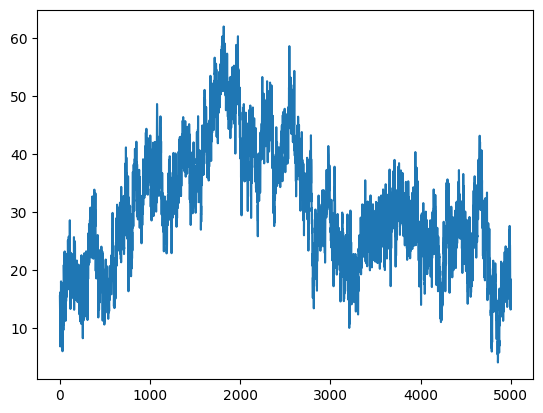

In [5]:
fig, ax = plt.subplots()
#ax.plot(df1.Frame,df6.kick)
ax.plot(df1.Frame,df1.kick)

In [6]:
fr=2999
print("scissor " + df1.scissor[fr].astype('str') + " kick " + df1.kick[fr].astype('str'))


scissor 96.78691032336754 kick 31.13057518005371


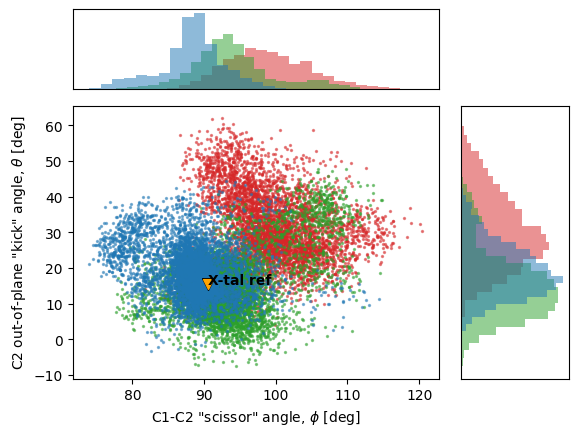

In [7]:
fig = plt.figure()
gs=GridSpec(4, 4)

ax_scatter = fig.add_subplot(gs[1:4, 0:3])
ax_hist_y = fig.add_subplot(gs[0,0:3])
ax_hist_x = fig.add_subplot(gs[1:4, 3])

ax_scatter.scatter(df1.scissor,df1.kick,alpha=0.5,s=2,color='tab:red')
ax_scatter.scatter(df2.scissor,df2.kick,alpha=0.5,s=2,color='tab:green')
ax_scatter.scatter(df3.scissor,df3.kick,alpha=0.5,s=2,color='tab:blue')

ax_scatter.scatter(df1.scissor[0],df1.kick[0],marker='v',s=70,c='black')
ax_scatter.scatter(df1.scissor[0],df1.kick[0],marker='v',s=50,c='orange')

ax_hist_y.hist(df1.scissor, color='tab:red', alpha=0.5,bins=25)
ax_hist_y.hist(df2.scissor, color='tab:green', alpha=0.5,bins=25)
ax_hist_y.hist(df3.scissor, color='tab:blue', alpha=0.5,bins=25)

ax_hist_x.hist(df1.kick, orientation = 'horizontal', color='tab:red', alpha=0.5,bins=25)
ax_hist_x.hist(df2.kick, orientation = 'horizontal', color='tab:green', alpha=0.5,bins=25)
ax_hist_x.hist(df3.kick, orientation = 'horizontal', color='tab:blue', alpha=0.5,bins=25)

#ax_scatter.annotate('X-tal ref', (df1.scissor[0], df1.kick[0]),size=10.1)
ax_scatter.annotate('X-tal ref', (df1.scissor[0], df1.kick[0]),size=10,c='black',weight='bold')

ax_scatter.set_xlabel(r'C1-C2 "scissor" angle, $\phi$ [deg]')
ax_scatter.set_ylabel(r'C2 out-of-plane "kick" angle, $\theta$ [deg]')

ax_hist_x.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
ax_hist_y.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
fig.savefig('/Users/jespermadsen/Projects/FV-HMMM/figures/c2_scissor_kick/scissor_kick_120.pdf')

In [8]:
from scipy.stats import gaussian_kde

In [9]:
x=pd.concat([df1.scissor,df2.scissor,df3.scissor])
y=pd.concat([df1.kick,df2.kick,df3.kick])
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

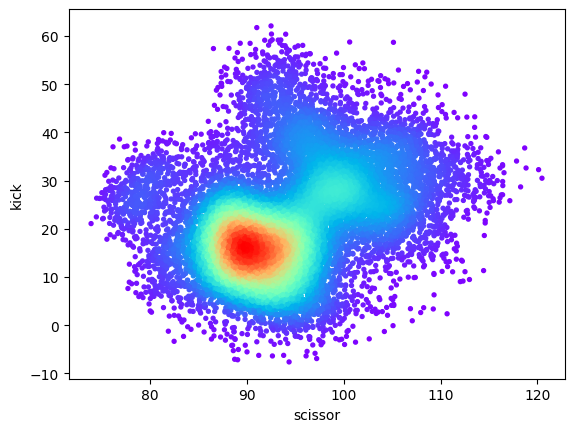

In [10]:
fig, ax = plt.subplots()
plt.scatter(x,y,s=8,cmap = 'rainbow',c=z,marker = 'o')
plt.xlabel('scissor')
plt.ylabel('kick')
#plt.scatter(af_x.dist,af_y.dist,c='black',s=70)
#plt.scatter(af_x.dist,af_y.dist,c='lime',s=50)
#plt.show()
plt.savefig('/Users/jespermadsen/Projects/FV-HMMM/figures/c2_scissor_kick/scissor_kick_kde_120.pdf')

In [11]:
df4=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7/openmm_dcle_tightrest/scissor_kick.csv')
df5=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7/openmm_dcle_tightrest.2/scissor_kick.csv')
df6=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7/openmm_dcle_tightrest.3/scissor_kick.csv')

In [12]:
x=pd.concat([df1.scissor,df2.scissor,df3.scissor,df4.scissor,df5.scissor,df6.scissor])
y=pd.concat([df1.kick,df2.kick,df3.kick,df4.kick,df5.kick,df6.kick])
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

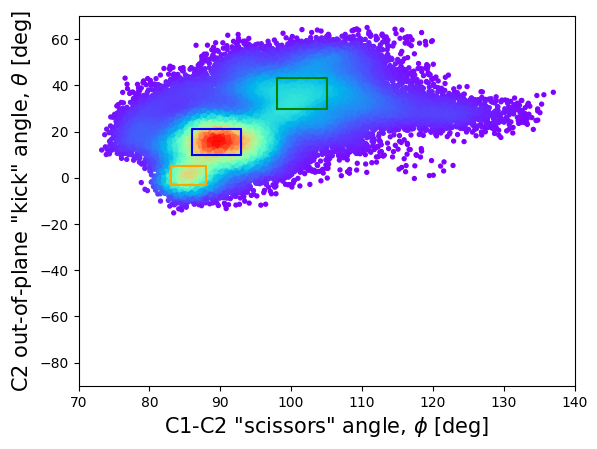

In [16]:
fig, ax = plt.subplots()
plt.scatter(x,y,s=8,cmap = 'rainbow',c=z,marker = 'o')
plt.xlabel(r'C1-C2 "scissors" angle, $\phi$ [deg]',size=15)
plt.ylabel(r'C2 out-of-plane "kick" angle, $\theta$ [deg]',size=15)
plt.xlim([70,140])
plt.ylim([-90,70])
plt.plot([86,93,93,86,86],[10,10,21,21,10],'b-')
plt.plot([83,88,88,83,83],[-3,-3,5,5,-3],'-',color='orange')
plt.plot([98,105,105,98,98],[30,30,43,43,30],'g-')
#plt.scatter(af_x.dist,af_y.dist,c='black',s=70)
#plt.scatter(af_x.dist,af_y.dist,c='lime',s=50)

plt.savefig('/Users/jespermadsen/Projects/FV-HMMM/figures/c2_scissor_kick/scissor_kick_kde_allmemb_hist_areas.pdf')
###plt.savefig('/Users/jespermadsen/Projects/FV-HMMM/figures/c2_scissor_kick/scissor_kick_kde_allmemb.pdf')

In [14]:
#xtal
dfx = x[x.between(86, 93) & y.between(10,21)]
dfy = y[x.between(86, 93) & y.between(10,21)]
#m1
dfx1 = x[x.between(83, 88) & y.between(-3,5)]
dfy1 = y[x.between(83, 88) & y.between(-3,5)]
#m2
dfx2 = x[x.between(98,105) & y.between(30,43)]
dfy2 = y[x.between(98,105) & y.between(30,43)]

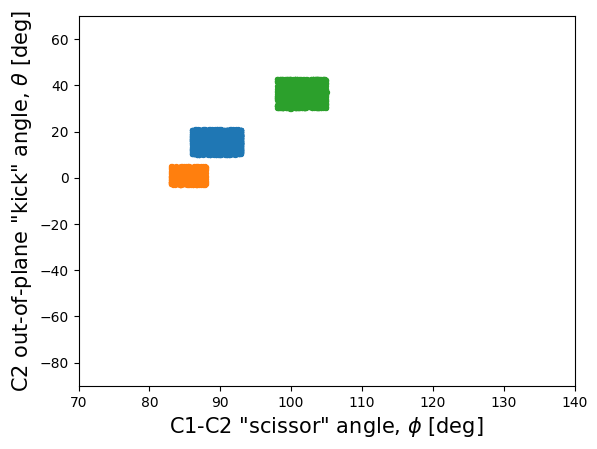

In [15]:
fig, ax = plt.subplots()
plt.scatter(dfx,dfy,s=8,cmap = 'rainbow',marker = 'o')
plt.scatter(dfx1,dfy1,s=8,cmap = 'rainbow',marker = 'o')
plt.scatter(dfx2,dfy2,s=8,cmap = 'rainbow',marker = 'o')
plt.xlabel(r'C1-C2 "scissor" angle, $\phi$ [deg]',size=15)
plt.ylabel(r'C2 out-of-plane "kick" angle, $\theta$ [deg]',size=15)
plt.xlim([70,140])
plt.ylim([-90,70])
#plt.scatter(af_x.dist,af_y.dist,c='black',s=70)
#plt.scatter(af_x.dist,af_y.dist,c='lime',s=50)
#plt.show()
fig.savefig("/Users/jespermadsen/Projects/FV-HMMM/figures/c2_scissor_kick/scissor_kick_kde_allmemb_hist0.pdf")

In [16]:
tdf1=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7_120apl/openmm_dcle_tightrest/tilt_angle.csv')
tdf2=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7_120apl/openmm_dcle_tightrest.2/tilt_angle.csv')
tdf3=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7_120apl/openmm_dcle_tightrest.3/tilt_angle.csv')
tdf4=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7/openmm_dcle_tightrest/tilt_angle.csv')
tdf5=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7/openmm_dcle_tightrest.2/tilt_angle.csv')
tdf6=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7/openmm_dcle_tightrest.3/tilt_angle.csv')


In [17]:
tdf=pd.concat([tdf1.tilt_angle,tdf2.tilt_angle,tdf3.tilt_angle,tdf4.tilt_angle,tdf5.tilt_angle,tdf6.tilt_angle])

Text(0, 0.5, 'Probability')

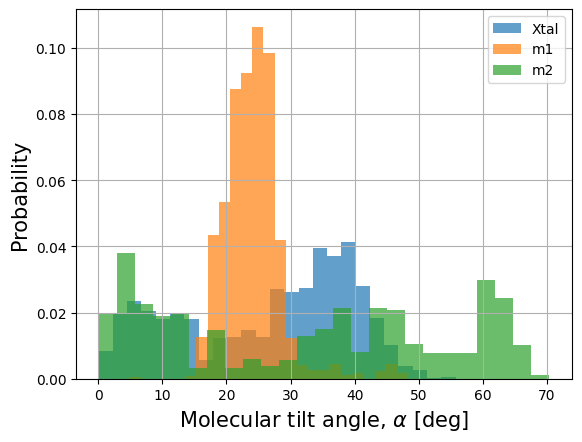

In [18]:
fig, ax = plt.subplots()
tdf[x.between(86, 93) & y.between(10,21)].hist(bins=25,density=True,alpha=0.7)
tdf[x.between(83, 88) & y.between(-3,5)].hist(bins=25,density=True,alpha=0.7)
tdf[x.between(98,105) & y.between(30,43)].hist(bins=25,density=True,alpha=0.7)
ax.legend(['Xtal','m1','m2'])
plt.xlabel(r"Molecular tilt angle, $\alpha$ [deg]",size=15)
plt.ylabel('Probability',size=15)
#fig.savefig("/Users/jespermadsen/Projects/FV-HMMM/figures/c2_scissor_kick/scissor_kick_kde_allmemb_hist_final.pdf")

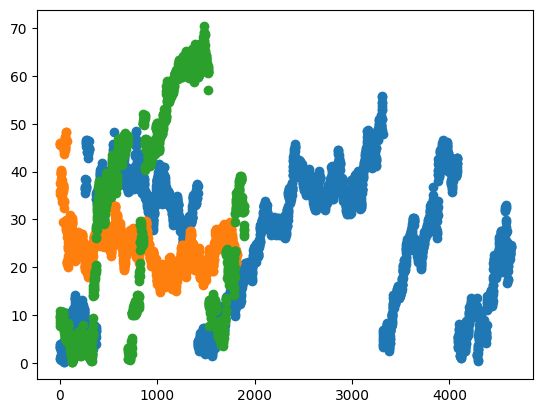

In [19]:
fig, ax = plt.subplots()
data1=tdf[x.between(86, 93) & y.between(10,21)]
data2=tdf[x.between(83, 88) & y.between(-3,5)]
data3=tdf[x.between(98,105) & y.between(30,43)]
plt.scatter(range(len(data1)),data1)
plt.scatter(range(len(data2)),data2)
plt.scatter(range(len(data3)),data3)

In [20]:
#bootstrapping
n_replicas=1000
histo_sample1 = pd.Series([data1.sample(frac=1, replace=True) for i in range(n_replicas)])
histo_sample2 = pd.Series([data2.sample(frac=1, replace=True) for i in range(n_replicas)])
histo_sample3 = pd.Series([data3.sample(frac=1, replace=True) for i in range(n_replicas)])

n_bins=25
bins1=np.histogram(np.hstack(histo_sample1[:]), bins=n_bins)[1]
bins2=np.histogram(np.hstack(histo_sample2[:]), bins=n_bins)[1]
bins3=np.histogram(np.hstack(histo_sample3[:]), bins=n_bins)[1]

#collect resampled data
histos1=np.zeros([n_replicas,n_bins])
for i in range(n_replicas): 
    histos1[i,:]=np.histogram(histo_sample1[i],bins1)[0]
    
#collect resampled data
histos2=np.zeros([n_replicas,n_bins])
for i in range(n_replicas): 
    histos2[i,:]=np.histogram(histo_sample2[i],bins2)[0]
    
#collect resampled data
histos3=np.zeros([n_replicas,n_bins])
for i in range(n_replicas): 
    histos3[i,:]=np.histogram(histo_sample3[i],bins3)[0]

In [21]:
#stats
lo1,med1,up1 = np.zeros(n_bins),np.zeros(n_bins),np.zeros(n_bins)
for i in range(n_bins):
    med1[i]=np.mean( histos1[:,i] )
    lo1[i]=med1[i] - np.percentile( histos1[:,i],5 )
    up1[i]=np.percentile( histos1[:,i], 95 ) - med1[i]

#stats
lo2,med2,up2 = np.zeros(n_bins),np.zeros(n_bins),np.zeros(n_bins)
for i in range(n_bins):
    med2[i]=np.mean( histos2[:,i] )
    lo2[i]=med2[i] - np.percentile( histos2[:,i],5 )
    up2[i]=np.percentile( histos2[:,i], 95 ) - med2[i]
    
#stats
lo3,med3,up3 = np.zeros(n_bins),np.zeros(n_bins),np.zeros(n_bins)
for i in range(n_bins):
    med3[i]=np.mean( histos3[:,i] )
    lo3[i]=med3[i] - np.percentile( histos3[:,i],5 )
    up3[i]=np.percentile( histos3[:,i], 95 ) - med3[i]

25 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


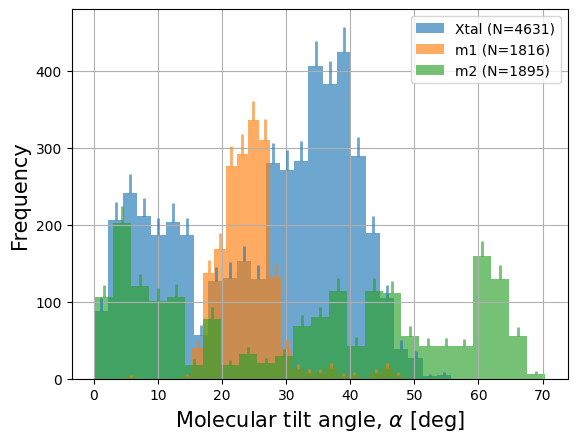

In [45]:
fig, ax = plt.subplots()
y1,binEdges1 = np.histogram(data1,bins=25)
bincenters1 = 0.5*(binEdges1[1:]+binEdges1[:-1])
y2,binEdges2 = np.histogram(data2,bins=25)
bincenters2 = 0.5*(binEdges2[1:]+binEdges2[:-1])
y3,binEdges3 = np.histogram(data3,bins=25)
bincenters3 = 0.5*(binEdges3[1:]+binEdges3[:-1])
#menStd     = np.sqrt(y)
width      = .8
#plt.bar(bincenters1, y1, width=width, color='tab:blue',alpha=0.5, yerr=[lo1,up1])
#plt.bar(bincenters2, y2, width=width, color='tab:red',alpha=0.5, yerr=[lo2,up2])
#plt.bar(bincenters3, y3, width=width, color='tab:green',alpha=0.5, yerr=[lo3,up3])
data1.hist(bins=25,density=False,alpha=0.65)
data2.hist(bins=25,density=False,alpha=0.65)
data3.hist(bins=25,density=False,alpha=0.65)

print(len(lo1),np.zeros(len(lo1)))
plt.bar(bincenters1, y1, width=width, color='tab:blue',alpha=0, yerr=[np.zeros(len(lo1)),up1],capsize=0,ecolor='tab:blue',error_kw=dict(elinewidth=2, ecolor='tab:blue',alpha=0.65))
plt.bar(bincenters2, y2, width=width, color='tab:blue',alpha=0, yerr=[np.zeros(len(lo1)),up2],capsize=0,ecolor='tab:orange',error_kw=dict(elinewidth=2, ecolor='tab:orange',alpha=0.65))
plt.bar(bincenters3, y3, width=width, color='tab:blue',alpha=0, yerr=[np.zeros(len(lo1)),up3],capsize=0,ecolor='tab:green',error_kw=dict(elinewidth=2, ecolor='tab:green',alpha=0.65))


ax.legend(['Xtal (N=4631)','m1 (N=1816)','m2 (N=1895)'])
plt.xlabel(r"Molecular tilt angle, $\alpha$ [deg]",size=15)
plt.ylabel('Frequency',size=15)

plt.show()
fig.savefig("/Users/jespermadsen/Projects/FV-HMMM/figures/c2_scissor_kick/scissor_kick_kde_allmemb_hist_final.pdf")


In [23]:
len(data2)

1816

In [24]:
len(data3)

1895

In [25]:
len(data1)

4631